In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
weights_dir = 'data/weights'
weights = {}
for filename in os.listdir(weights_dir):
    if filename.endswith('.json'):
        with open(os.path.join(weights_dir, filename), 'r') as f:
            weights[filename.split('.')[0]] = json.load(f)

In [28]:
start_amount = 10000
with open("data/selected_cluster_stocks.txt", "r") as f:
    tickers = [line.strip() for line in f]

# Define the file path template
test_file_path_template = "data/processed_data/test/{}_processed.csv"

# Load preprocessed data into a dictionary
test_data_dict = {}
for ticker in tickers:
    # Load each ticker's data and assume it has 'Normed Return' and other necessary columns
    test_data_dict[ticker] = pd.read_csv(test_file_path_template.format(ticker), index_col='date', parse_dates=True)

In [29]:
test_data_dir = 'data/processed_data/test'
test_data = {}


# Convert test data to a DataFrame where each column is a stock's prices
test_data_df = pd.DataFrame({ticker: data['adj_close'] for ticker, data in test_data_dict.items()})

# Step 3: Normalize test data (convert prices to returns)
normalized_returns = test_data_df / test_data_df.iloc[0]  # Normalize prices to start at 1

# Step 4: Calculate portfolio values over time for each algorithm
portfolio_values = {}
for algo, weight_dict in weights.items():
    # Convert weights to a series and ensure the order matches the test data columns
    weight_series = pd.Series(weight_dict).astype(float)
    # Calculate the weighted returns by applying weights to normalized returns
    weighted_returns = normalized_returns.mul(weight_series, axis=1)
    # Sum across all tickers to get the total portfolio value over time
    portfolio_values[algo] = (weighted_returns.sum(axis=1) * start_amount)


In [32]:
weighted_returns

,ADM,LIN,EXR,DXCM,PAYC,AXON,PWR,CSGP,AAPL,STLD,DECK,FTNT,ENPH
date,,,,,,,,,,,,,
2023-01-03,0.0,0.166667,0.0,0.0,0.0,0.166667,0.166667,0.166667,0.166667,0.166667,0.0,0.0,0.0
2023-01-04,0.0,0.165839,0.0,0.0,0.0,0.167182,0.164225,0.167418,0.168386,0.172866,0.0,0.0,0.0
2023-01-05,0.0,0.159934,0.0,0.0,0.0,0.164190,0.160693,0.160764,0.166600,0.173006,0.0,0.0,0.0
2023-01-06,0.0,0.165520,0.0,0.0,0.0,0.169302,0.164901,0.165529,0.172730,0.179836,0.0,0.0,0.0
2023-01-09,0.0,0.168536,0.0,0.0,0.0,0.175791,0.164332,0.165443,0.173436,0.177542,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.0,0.218010,0.0,0.0,0.0,0.256608,0.254043,0.187744,0.259431,0.215913,0.0,0.0,0.0
2023-12-26,0.0,0.217580,0.0,0.0,0.0,0.255696,0.254779,0.187873,0.258694,0.214868,0.0,0.0,0.0
2023-12-27,0.0,0.218260,0.0,0.0,0.0,0.256657,0.256310,0.187980,0.258828,0.214247,0.0,0.0,0.0


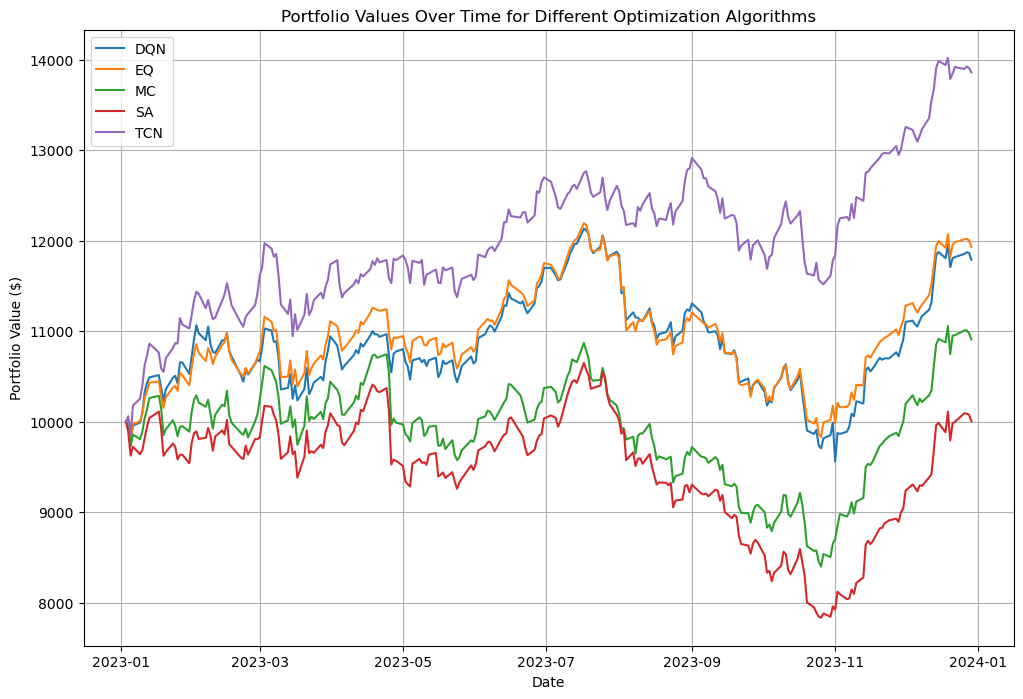

In [33]:

# Step 5: Plot the portfolio values over time for each algorithm
plt.figure(figsize=(12, 8))
for algo, values in portfolio_values.items():
    plt.plot(values, label=algo)

plt.title("Portfolio Values Over Time for Different Optimization Algorithms")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.show()